# Exercise 06 Classification III - Solution

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

### Import libraries

In [1]:
# import all libraries used in this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import classification_report

## Part 1. Decision Tree Classifier

Build a binary classifier using decision tree algorithm for the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)

### Load dataset

In [2]:
# load dataset
feature_df, target_df = datasets.load_breast_cancer(
    return_X_y = True,
    as_frame = True
)

### Train test split

70% as the training dataset and the rest as the testing dataset.

Only keep the first two features as the inputs for the convenience of visualization

Shuffle the entire dataset before spliting.

Guarantee the reproducibility by fixing `random_state` as 0.

In [3]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df[['mean radius', 'mean texture']].values,
    target_df.values,
    train_size = 0.7,
    shuffle = True,
    random_state = 0
)

### Train the model

Use `sklearn.tree.DecisionTreeClassifier` to implement a binary classifier.

Use information gain as the criterion to select conditions for decision nodes by setting `criterion = 'entropy'`.

First, let us grow a complete a tree without pruning.

In [4]:
# train a classifier using decision tree
clf = DecisionTreeClassifier(
    criterion = 'entropy', # use information gain as the criterion
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

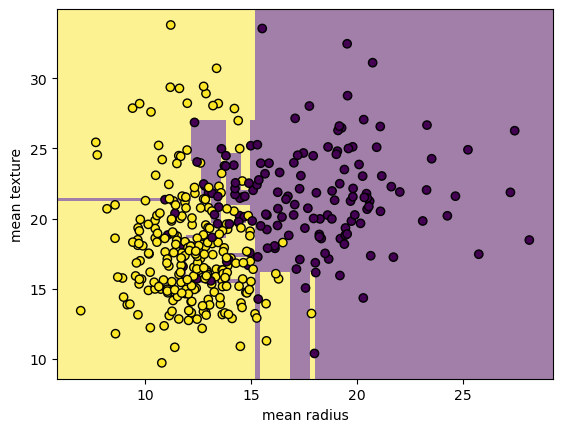

In [5]:
# display the decision boundary learned from the training dataset
# plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    response_method = "predict",
    plot_method = "pcolormesh",
    xlabel = 'mean radius',
    ylabel = 'mean texture',
    shading = "auto",
    alpha = 0.5
)
# plot training data points
disp.ax_.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c = y_train,
    edgecolors = 'k'
)
plt.show()

From the displayed deicsion boundary we can find, the feature space is divided into many fragmented parts.

In some parts, there is only one data points, which indicated we might get an over-fitted model.

We can display the learned decision tree to check if there is an over-fitting.

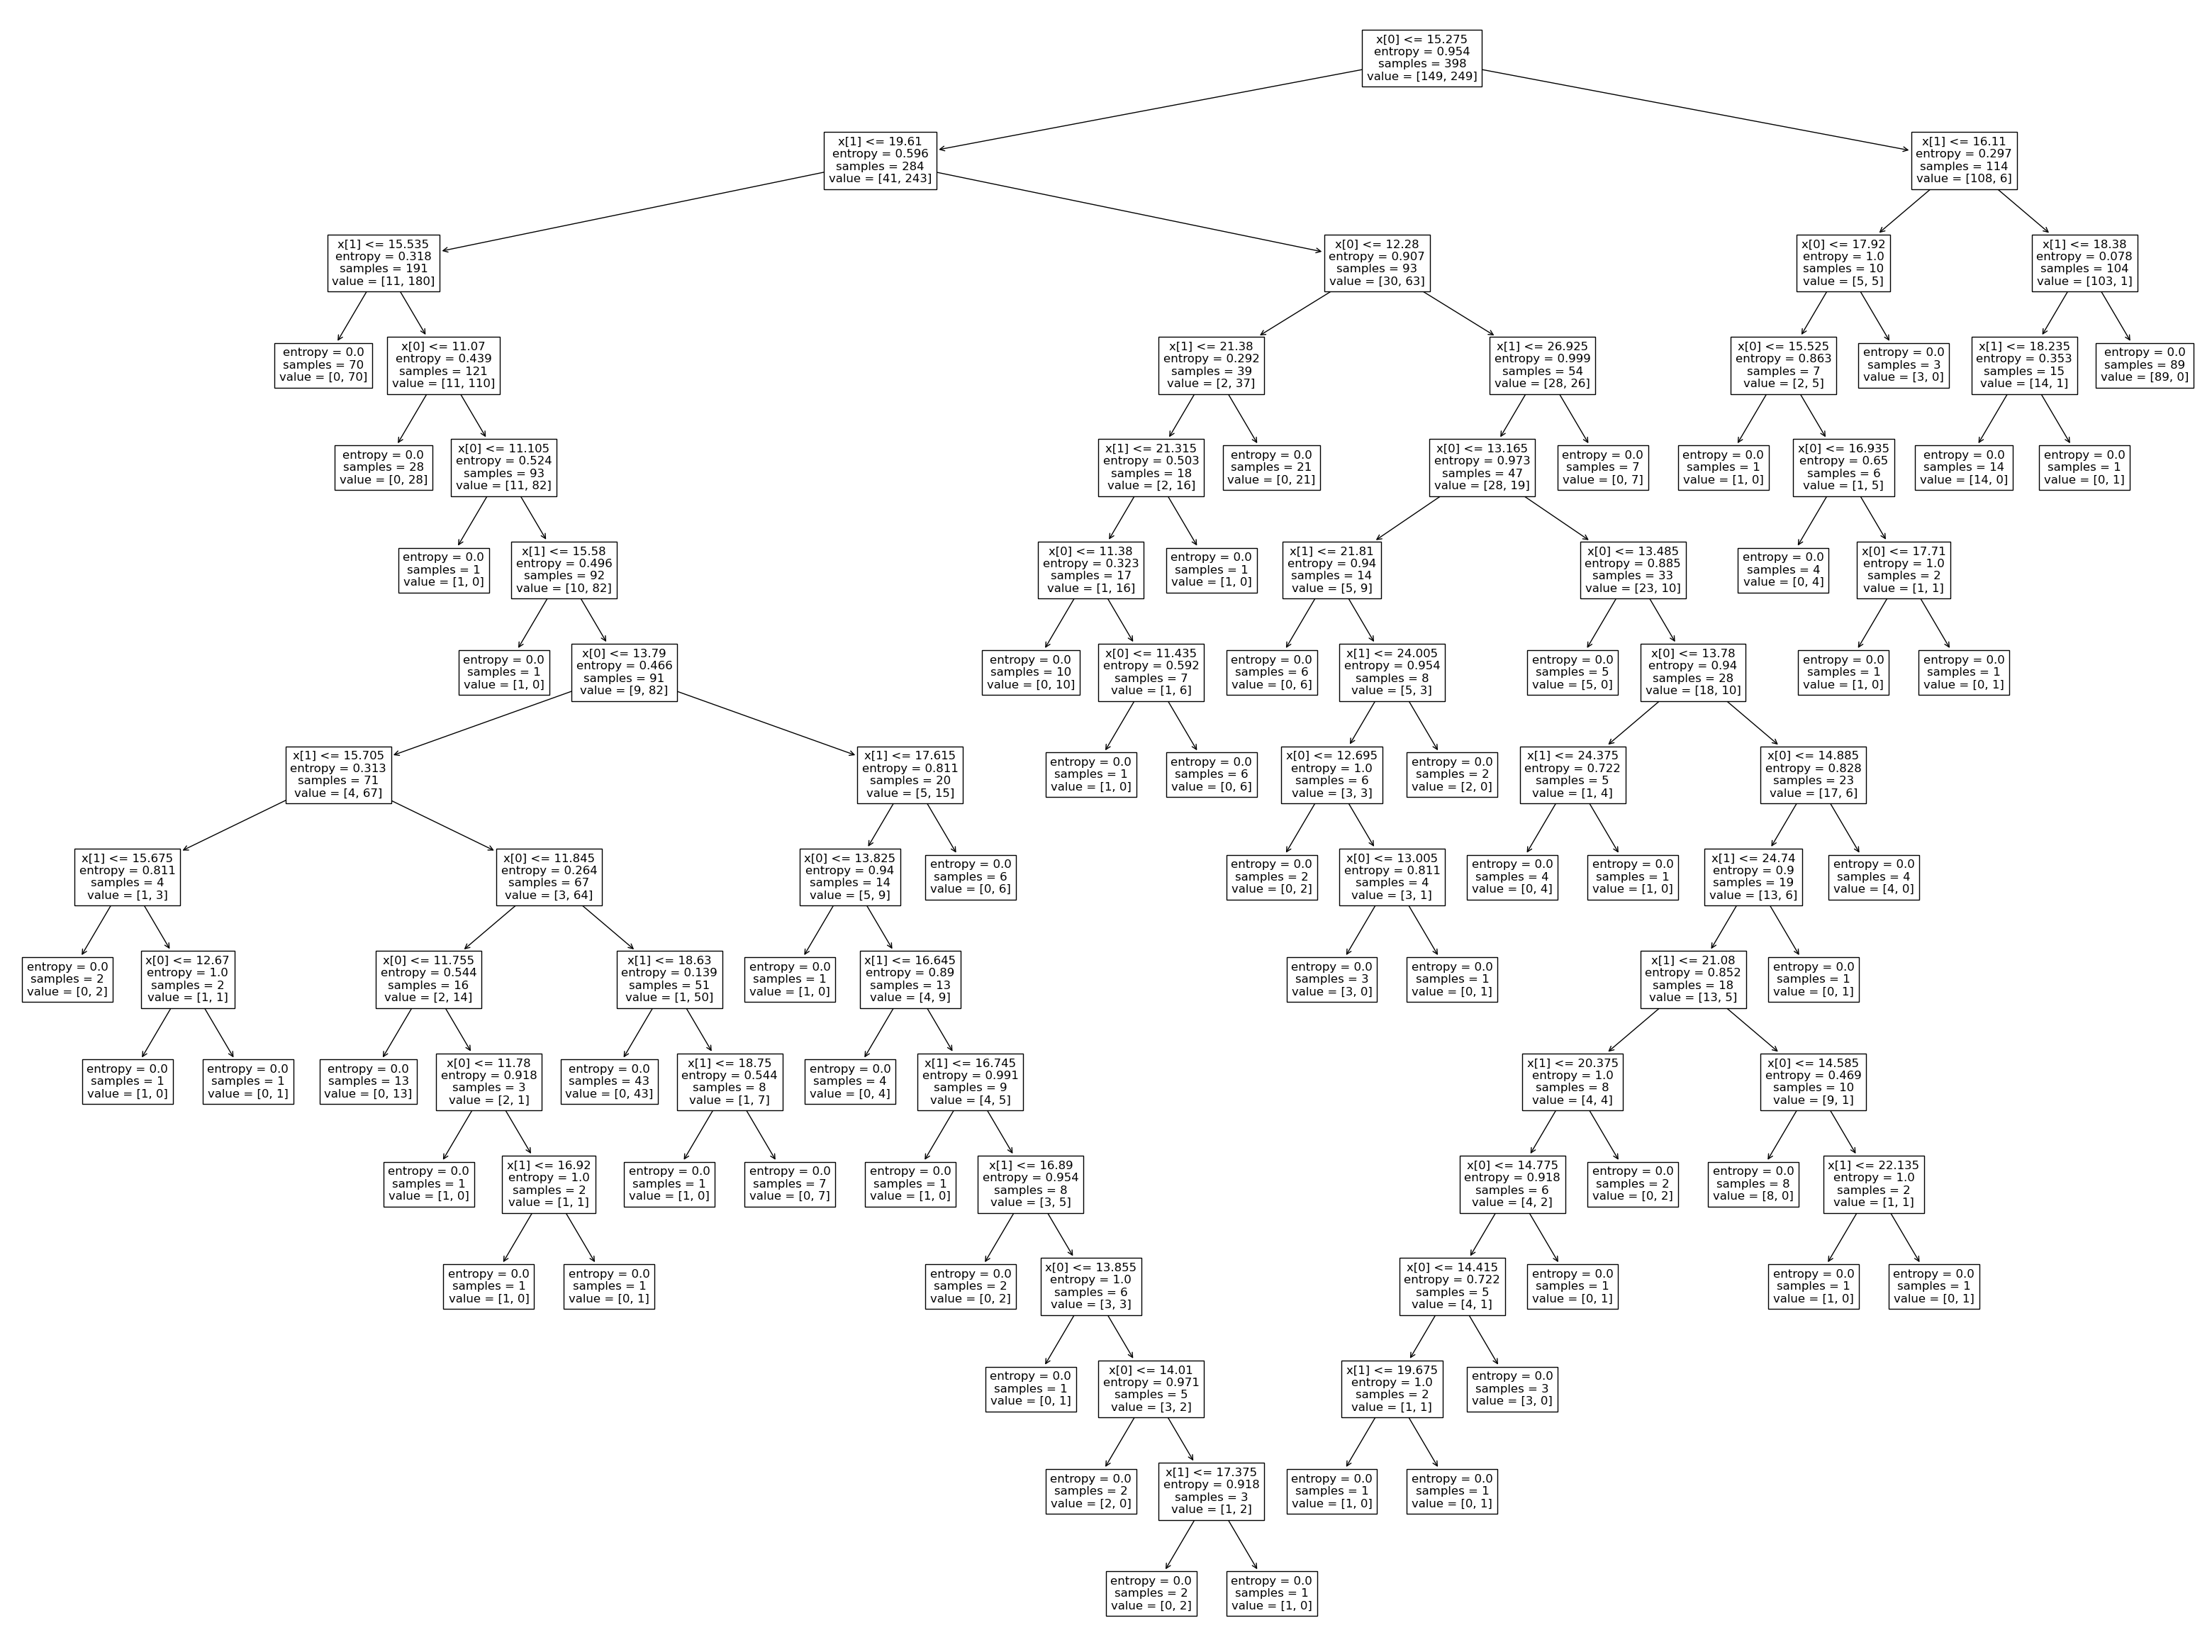

In [6]:
# plot the tree structure
plt.figure(figsize = [40, 30])
plot_tree(clf)
plt.show()

From the displayed decision tree we can find, all leaf nodes are pure nodes.

Most of the leaf nodes only contain one data point, which indicated there is an over-fitting.

We need to pruning the tree to avoid that.

`sklearn.tree.DecisionTreeClassifier` performs pre-pruning by setting different restriction hyper-parameters.

For example, we can limit the maximum depth of the tree.

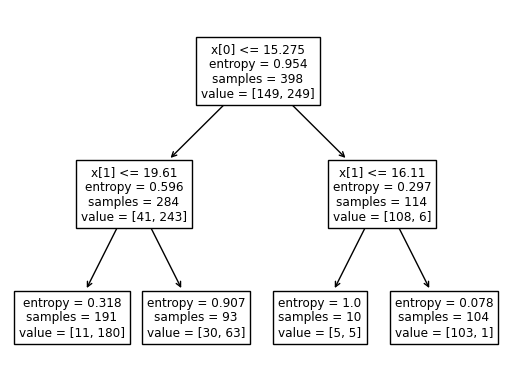

In [7]:
# pre-pruning by limiting the max depth of the tree
clf = DecisionTreeClassifier(
    criterion = 'entropy', # use information gain as the criterion
    max_depth = 2
)
clf.fit(X_train, y_train)
# plot the tree structure
plot_tree(clf)
plt.show()

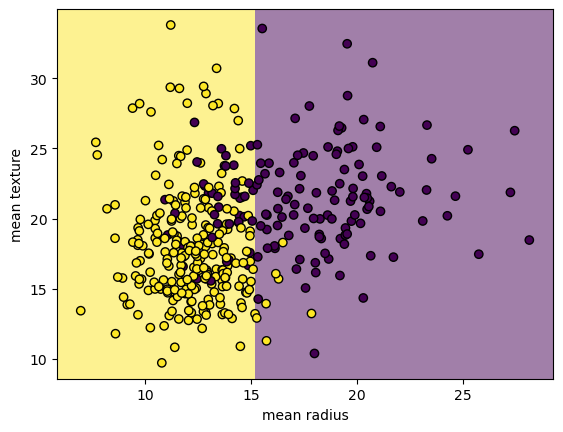

In [8]:
# display the decision boundary learned from the training dataset
# plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    response_method = "predict",
    plot_method = "pcolormesh",
    xlabel = 'mean radius',
    ylabel = 'mean texture',
    shading = "auto",
    alpha = 0.5
)
# plot training data points
disp.ax_.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c = y_train,
    edgecolors = 'k'
)
plt.show()

### Evaluate the model

In [9]:
# predict categories for testing dataset
y_pred = clf.predict(X_test)
# show the first 5 prediction
y_pred[:5]

array([1, 1, 1, 1, 1])

In [10]:
# predict probabilities for testing dataset
y_pred_proba = clf.predict_proba(X_test)
# show the first 5 predicted probability
y_pred_proba[:5, :]

array([[0.32258065, 0.67741935],
       [0.32258065, 0.67741935],
       [0.05759162, 0.94240838],
       [0.05759162, 0.94240838],
       [0.05759162, 0.94240838]])

In [11]:
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83        63
           1       0.86      0.98      0.92       108

    accuracy                           0.89       171
   macro avg       0.91      0.86      0.87       171
weighted avg       0.90      0.89      0.88       171



## Part 2. Hyper-parameter tuning through cross-validation

In this part, we will perform hyper-parameter tuning for the decision tree classifier through 3-fold cross-validation to improve the model's performance.

We will adopt the grid search strategy by using `sklearn.model_selection.GridSearchCV`.

A search consists of:

- a model (the decision tree classifier);
- a hyper-parameter space (the values of hyper-parameters to search);
- a method for searching or sampling candidates (grid search);
- a cross-validation scheme (3-fold cross-validation); and
- a score function (performance metric to compare different hyper-parameter combinations).

### Define the hyper-parameter space

In [12]:
# define the hyper-parameters to search
param_dict = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4]
}

### Grid search

`sklearn.model_selection.GridSearchCV` will trained a set of models with the same dataset (training and validation) but different hyper-parameters.

We can specify `refit = True` to retrain a best model using the best hyper-parameters find by grid search and also the entire training dataset (no fold left for validation).

We can get this best model by the attribute `GridSearchCV.best_estimator_`.

In [13]:
# hyper-parameter tuning through cross-validation
grid_clf = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = param_dict,
    scoring = 'f1_weighted',
    refit = True,
    cv = 3,
    verbose = 3
)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .......criterion=gini, max_depth=2;, score=0.876 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=2;, score=0.861 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=2;, score=0.845 total time=   0.0s
[CV 1/3] END .......criterion=gini, max_depth=3;, score=0.916 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=3;, score=0.829 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=3;, score=0.873 total time=   0.0s
[CV 1/3] END .......criterion=gini, max_depth=4;, score=0.863 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=4;, score=0.844 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=4;, score=0.902 total time=   0.0s
[CV 1/3] END ....criterion=entropy, max_depth=2;, score=0.876 total time=   0.0s
[CV 2/3] END ....criterion=entropy, max_depth=2;, score=0.861 total time=   0.0s
[CV 3/3] END ....criterion=entropy, max_depth=2;,

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4]},
             scoring='f1_weighted', verbose=3)

In [14]:
# obtain the best hyper-parameters the best score
print('Best hyper-parameters:', grid_clf.best_params_)
print('Best score:', grid_clf.best_score_)

Best hyper-parameters: {'criterion': 'gini', 'max_depth': 3}
Best score: 0.8727488059454654


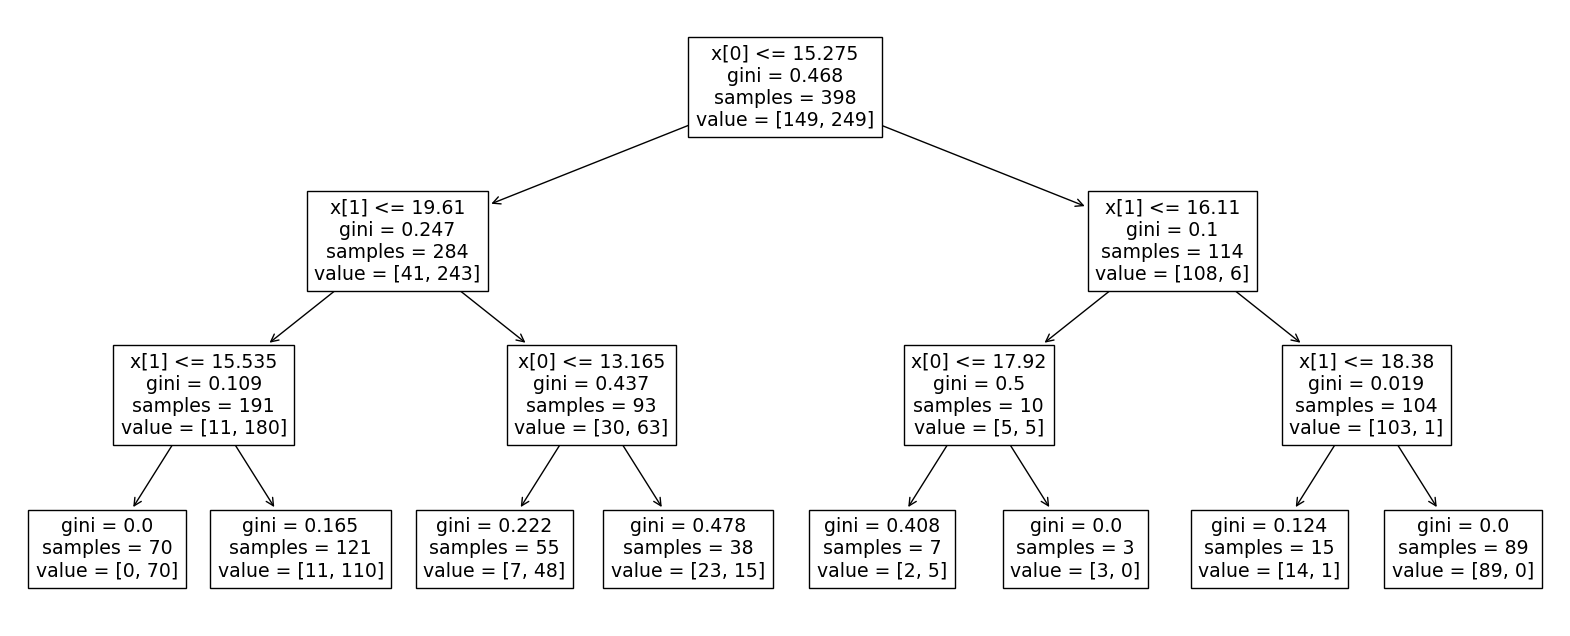

In [15]:
# obtain the best estimator
plt.figure(figsize = [20, 8])
plot_tree(grid_clf.best_estimator_)
plt.show()

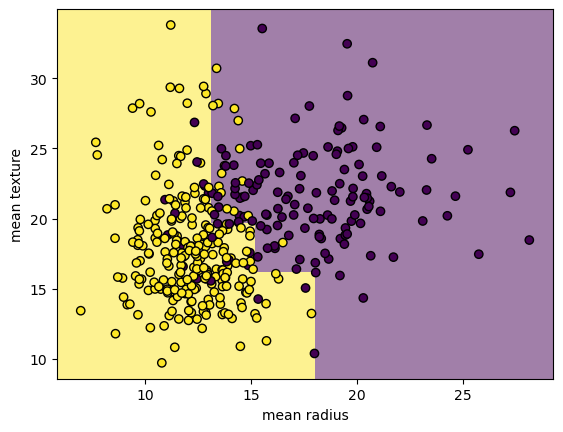

In [16]:
# display the decision boundary learned from the training dataset
# plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    grid_clf.best_estimator_,
    X_train,
    response_method = "predict",
    plot_method = "pcolormesh",
    xlabel = 'mean radius',
    ylabel = 'mean texture',
    shading = "auto",
    alpha = 0.5
)
# plot training data points
disp.ax_.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c = y_train,
    edgecolors = 'k'
)
plt.show()

### Final evaluation using the testing dataset

In [17]:
# predict categories for testing dataset
y_pred = grid_clf.predict(X_test)
# show the first 5 prediction
y_pred[:5]

array([0, 0, 1, 1, 1])

In [18]:
# predict probabilities for testing dataset
y_pred_proba = grid_clf.predict_proba(X_test)
# show the first 5 predicted probability
y_pred_proba[:5, :]

array([[0.60526316, 0.39473684],
       [0.60526316, 0.39473684],
       [0.09090909, 0.90909091],
       [0.09090909, 0.90909091],
       [0.09090909, 0.90909091]])

In [19]:
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        63
           1       0.94      0.90      0.92       108

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.89       171
weighted avg       0.90      0.90      0.90       171



## Part 3. Hands-on exercise

In this exercise, we will build a multi-class classifier with the the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

The goal of the classifier is to perform a multi-class classification taks:
- 0 represents 'Low Price', 'MedHouseVal' < 1
- 1 represents 'Normal Price', 1 <= 'MedHouseVal' <= 2.5
- 2 represents 'Expensive Price', 'MedHouseVal' > 2.5

<span style="color:red">**[TBC]**</span> Please complete the following steps:
- Build the classifier using decision tree.
- Perform hyper-parameter tuning through cross-validation to improve model's performance.
    - Use grid search strategy `sklearn.model_selection.GridSearchCV`
    - Use random search strategy `sklearn.model_selection.RandomizedSearchCV`

### Task 1. Load, pre-process, and split the dataset

<span style="color:red">**[TBC]**</span> Please complete the following steps:
- Load the dataset
- Construct the new multi-class target variable use `MedHouseVal` as reference
- Split the dataset into training and testing sets

In [20]:
# [TBC] complete your code here with proper comments
feature_df, target_df = datasets.fetch_california_housing(return_X_y = True, as_frame = True)

In [21]:
# [TBC] complete your code here with proper comments
# convert 'MedHouseVal' into discrete categories
def target_encoding(x):
    if x < 1:
        return 0
    if x > 2.5:
        return 2
    return 1
target_df = target_df.apply(target_encoding)

In [22]:
# [TBC] complete your code here with proper comments
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values,
    target_df.values,
    train_size = 0.7,
    random_state = 0
)

### Task 2. Hyper-parameter tuning using grid search strategy

<span style="color:red">**[TBC]**</span> Please complete the following steps:
- Define the hyper-parameters to search
    - `criterion`
    - `max_depth`
    - `min_samples_split`
    - `min_samples_leaf`
    - `max_features`
    - `min_impurity_decrease`
- Perform grid search with cross-validation
    - Check the best estimator and the best score
    - If needed, refine the hyper-parameters to search, redo the grid search
    - If good enough, continue with the best hyper-parameters found by the grid search
- Train the model with the best hyper-parameters
- Evaluate the performance with the testing dataset

In [23]:
# [TBC] complete your code here with proper comments
# define the hyper-parameters to search
param_dict = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

In [24]:
# [TBC] complete your code here with proper comments
# hyper-parameter tuning through cross-validation
grid_clf = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = param_dict,
    scoring = 'f1_weighted',
    refit = True,
    cv = 7,
    verbose = 1
)
grid_clf.fit(X_train, y_train)

Fitting 7 folds for each of 729 candidates, totalling 5103 fits


GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1_weighted', verbose=1)

In [25]:
# [TBC] complete your code here with proper comments
# obtain the best hyper-parameters the best score
print('Best hyper-parameters:', grid_clf.best_params_)
print('Best score:', grid_clf.best_score_)

Best hyper-parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best score: 0.780174039672356


In [26]:
# [TBC] complete your code here with proper comments
# predict categories for testing dataset
y_pred = grid_clf.predict(X_test)

In [27]:
# [TBC] complete your code here with proper comments
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1074
           1       0.79      0.85      0.82      3376
           2       0.80      0.74      0.77      1743

    accuracy                           0.79      6193
   macro avg       0.79      0.76      0.77      6193
weighted avg       0.79      0.79      0.79      6193



### Task 3. Hyper-parameter tuning using random search strategy

Instead of perform an exhausive grid search, using random search strategy instead.

<span style="color:red">**[TBC]**</span> Please complete the following steps:
- Define the hyper-parameters to search
- Perform random search with cross-validation
- Train the model with the best hyper-parameters
- Evaluate the performance with the testing dataset

In [28]:
# [TBC] complete your code here with proper comments
from scipy.stats import uniform, randint

# define the hyper-parameters to search
param_distributions = dict(
    criterion = ['gini', 'entropy', 'log_loss'],
    max_depth = [None, 5, 10, 15, 20, 25],
    min_samples_split = randint(low = 2, high = 6),
    min_samples_leaf = randint(low = 1, high = 5),
    max_features = [None, 'sqrt', 'log2'],
    min_impurity_decrease = uniform()
)

In [29]:
# [TBC] complete your code here with proper comments
from sklearn.model_selection import RandomizedSearchCV

# hyper-parameter tuning through cross-validation
rand_clf = RandomizedSearchCV(
    estimator = DecisionTreeClassifier(),
    param_distributions = param_distributions,
    n_iter = 300,
    scoring = 'f1_weighted',
    refit = True,
    cv = 7,
    verbose = 1
)
rand_clf.fit(X_train, y_train)

Fitting 7 folds for each of 300 candidates, totalling 2100 fits


RandomizedSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_iter=300,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 10, 15, 20, 25],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x157842c90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15785a090>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1575921d0>},
                   scoring='f1_weighted', verbose=1)

In [30]:
# [TBC] complete your code here with proper comments
# obtain the best hyper-parameters the best score
print('Best hyper-parameters:', rand_clf.best_params_)
print('Best score:', rand_clf.best_score_)

Best hyper-parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_impurity_decrease': 0.0014691437029137333, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best score: 0.7688239235780312


In [31]:
# [TBC] complete your code here with proper comments
# predict categories for testing dataset
y_pred = rand_clf.predict(X_test)

In [32]:
# [TBC] complete your code here with proper comments
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1074
           1       0.77      0.82      0.80      3376
           2       0.81      0.71      0.76      1743

    accuracy                           0.77      6193
   macro avg       0.76      0.74      0.75      6193
weighted avg       0.77      0.77      0.77      6193

